In [23]:
import cv2
import numpy as np
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt
import os

In [24]:
input_dir = 'motion-detection-frames'
output_dir = 'blob-detection-output'

In [25]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [48]:
min_area = 10000  # Area minima per considerare un blob come persona
max_area = 50000 # Area massima per considerare un blob come persona

In [27]:
out = cv2.VideoWriter("blob-detection-output.avi", cv2.VideoWriter_fourcc(*"MJPG"), 15, (3420,1910))

In [29]:
features_list = []

In [28]:
def extract_features(contour):
    area = cv2.contourArea(contour)  # Area del blob
    x, y, w, h = cv2.boundingRect(contour)  # Bounding box
    aspect_ratio = float(h) / w  # Rapporto altezza/larghezza
    perimeter = cv2.arcLength(contour, True)  # Perimetro
    circularity = (4 * np.pi * area) / (perimeter**2) if perimeter > 0 else 0  # Circolarità
    
    return {
        "area": area,
        "aspect_ratio": aspect_ratio,
        "circularity": circularity,
        "bounding_box": (x, y, w, h)
    }

Original frame


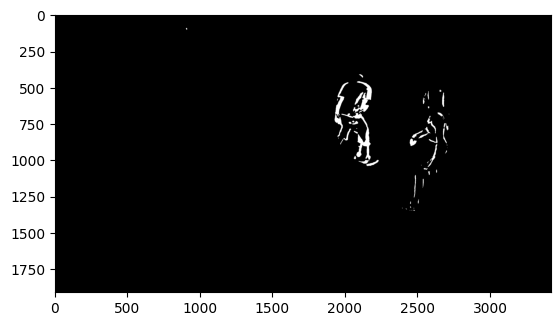

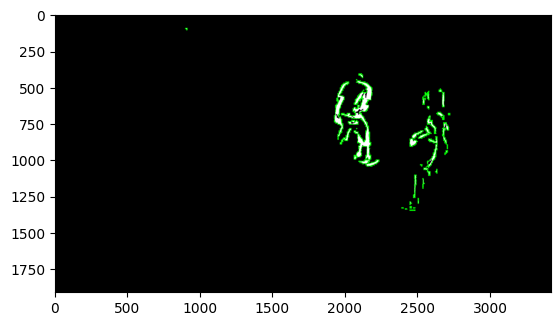

Detected person


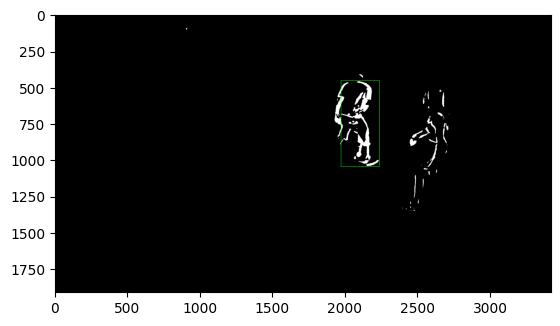

In [49]:
frame = cv2.imread(f"{input_dir}/frame625.jpg", cv2.IMREAD_GRAYSCALE)
print("Original frame")
plt.imshow(frame, cmap="gray")
plt.show()

frameTest = frame

contours, _ = cv2.findContours(frameTest, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
frameTest = cv2.merge([frameTest, frameTest, frameTest])

plt.imshow(cv2.drawContours(frameTest, contours, -1, (0, 255, 0), 2), cmap="gray")
plt.show()
areas = []

for contour in contours:
    
    area = cv2.contourArea(contour)
    areas.append(area)
    if min_area < area < max_area:
        features = extract_features(contour)
        features["frame"] = f"frame625.jpg"
        features_list.append(features)
        
        x, y, w, h = features["bounding_box"]
        output_frame = cv2.merge([frame, frame, frame])  # Converti in RGB
        cv2.rectangle(output_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print("Detected person")
        plt.imshow(output_frame)
        plt.show()

In [63]:
print("Areas:", areas.index(29187.0))

Areas: 770


Test 2

In [2]:
import cv2
from matplotlib import pyplot as plt

Original frame


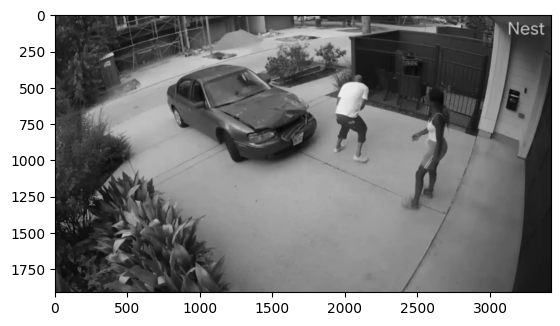

In [13]:
frame = cv2.imread(f"preprocessed-frames/frame625.jpg")
print("Original frame")
plt.imshow(frame, cmap='gray')
plt.show()

Treshold frame


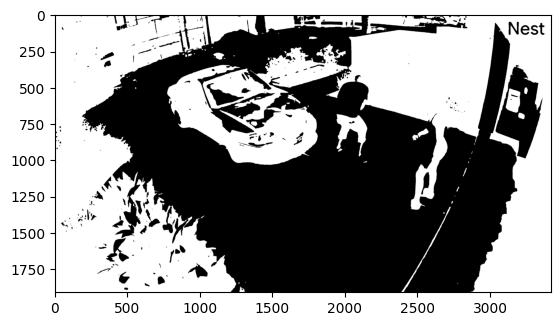

In [15]:
ret, im = cv2.threshold(frame, 100, 255, cv2.THRESH_BINARY_INV)
print("Treshold frame")
plt.imshow(im, cmap='gray')
plt.show()

In [ ]:
conts, herirarchy = cv2.findContours(frame.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
biggest = sorted(conts,key = cv2.contourArea,reverse=True)[0]
rect = cv2.boundingRect(biggest)
x,y,w,h = rect
cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
